# tek değişkenli veri seti analizi 

In [1]:
import seaborn as sns 

In [2]:
import pandas as pd 

In [3]:
import numpy as np 

In [4]:
import matplotlib.pyplot as plt

In [5]:
tips = sns.load_dataset("tips")

In [6]:
df = tips.copy()

In [7]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
df.isnull().sum()   # veri setinde hiç bir boşluk yok

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
kat_df = df.select_dtypes(include=["category"])

In [12]:
df.value_counts("sex")

sex
Male      157
Female     87
Name: count, dtype: int64

In [13]:
df.value_counts("smoker")

smoker
No     151
Yes     93
Name: count, dtype: int64

In [14]:
df.value_counts("day")

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [15]:
df.value_counts("time")

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [16]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

size gelen kişilerin boyunuu gösteriyor syısal gibi gözükübeilir ama katogotrik gibi de düşünelebilir 

In [17]:
df.duplicated().sum() # tekrar eden kayıt var mı 


np.int64(1)

In [18]:
Q1 = df["total_bill"].quantile(0.25)
Q3 = df["total_bill"].quantile(0.75)
IQR = Q3 - Q1


In [19]:
df.head(0)

,total_bill,tip,sex,smoker,day,time,size


In [20]:
alt_sinir =( Q1 - 1.5 * IQR )
ust_sinir = Q3 + 1.5 * IQR

print(alt_sinir , ust_sinir)

-2.8224999999999945 40.29749999999999


In [21]:
Q1 = df["tip"].quantile(0.25)
Q3 = df["tip"].quantile(0.75)
IQR = Q3 - Q1

In [22]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
print(alt_sinir , ust_sinir)


-0.34375 5.90625


In [23]:
Q1 = df["size"].quantile(0.25)
Q3 = df["size"].quantile(0.75)
IQR = Q3 - Q1

In [24]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR
print(alt_sinir , ust_sinir)


0.5 4.5


## YORUM 
244 satır 7 colon var 

veri de eksik bilgi yok

3 adet sayısal 4 adet katogorik değişken var 

genelde hesap ödeyenler erkek 

genelde sigara içilmiyor 

en az yoğunluk cuma gunu en fazla yoğunluk cumartesi

genelde akşam yemeğine geliniyor 

In [25]:
df[df["tip"]==10] # 3 kişi yemek yemişler sigara içmişler 50 $ hesap 10 $ bahşiş

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


## Histogram

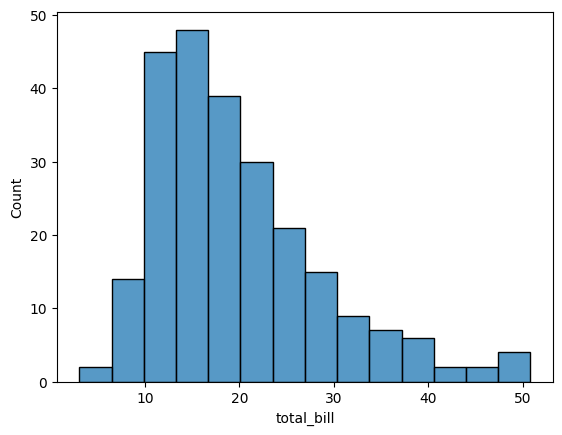

In [26]:
sns.histplot(data=df, x="total_bill");

In [27]:
df["total_bill"].value_counts()

total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

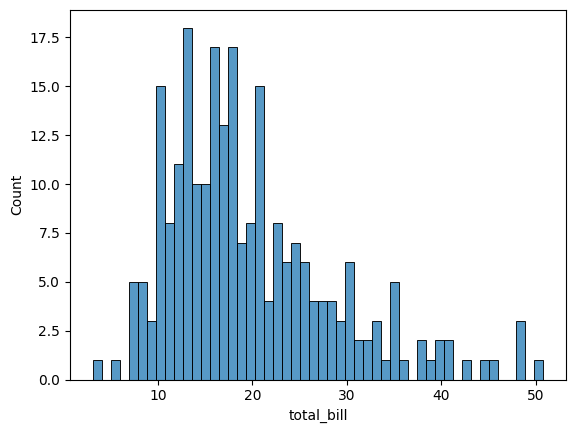

In [28]:
sns.histplot(data=df, x="total_bill", bins=50);

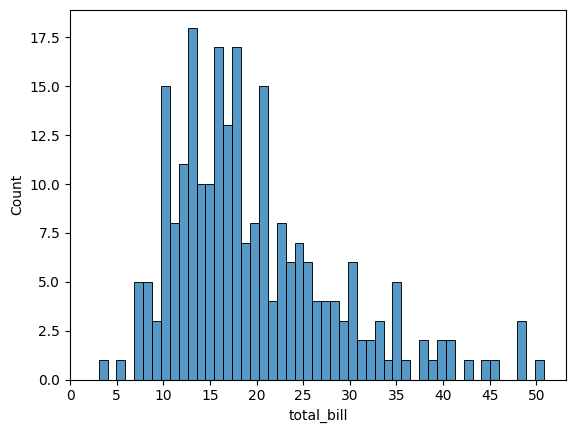

In [29]:
sns.histplot(df["total_bill"], bins=50)

# X eksenindeki değerleri artır
plt.xticks(np.arange(0, 51,5))   # 0'dan 60'a kadar her 5 dolarda bir işaret koy
plt.show()

Text(0.5, 1.0, 'yoğunluk sesabı ile birlikte')

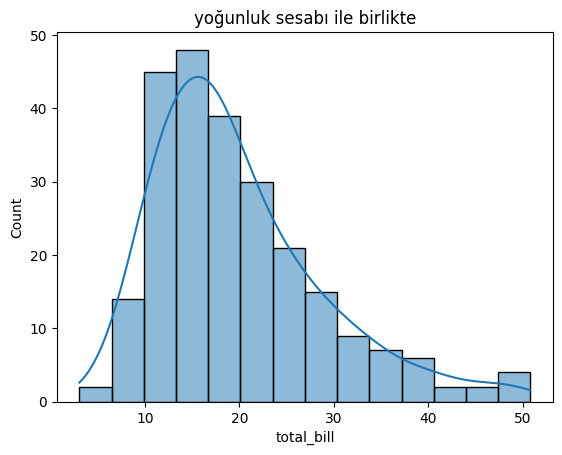

In [30]:
sns.histplot(data=df, x="total_bill", kde=True)
plt.title("yoğunluk sesabı ile birlikte")

In [31]:
# value_counts her bir değerin kaç defa tekrar ettiğini söylerken historhram aralıklarda ne kadar değer oldugunu gösteriyor 

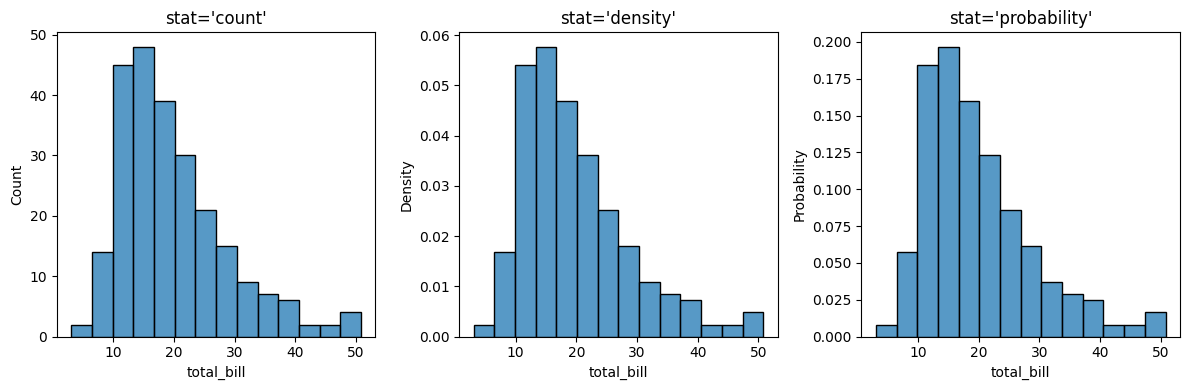

In [32]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(data=df, x="total_bill", stat="count")
plt.title("stat='count'")

plt.subplot(1,3,2)
sns.histplot(data=df, x="total_bill", stat="density")
plt.title("stat='density'")

plt.subplot(1,3,3)
sns.histplot(data=df, x="total_bill", stat="probability")
plt.title("stat='probability'")

plt.tight_layout()
plt.show()


stat y eksenin belirtiyor eger ki deger girmez ise defaolut olarak count oluyor 

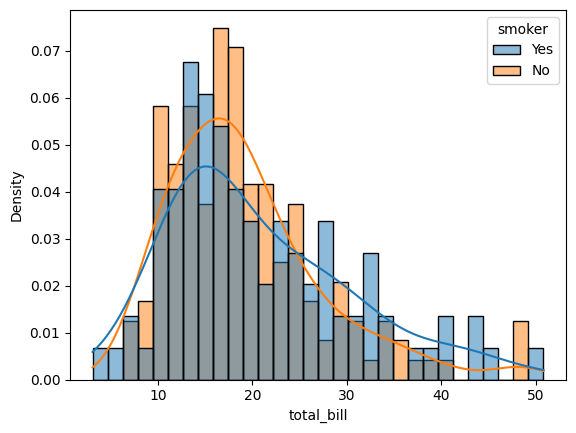

In [33]:
sns.histplot(data=df, x="total_bill", hue="smoker", kde=True,bins=30, stat="density", common_norm=False)
plt.show()


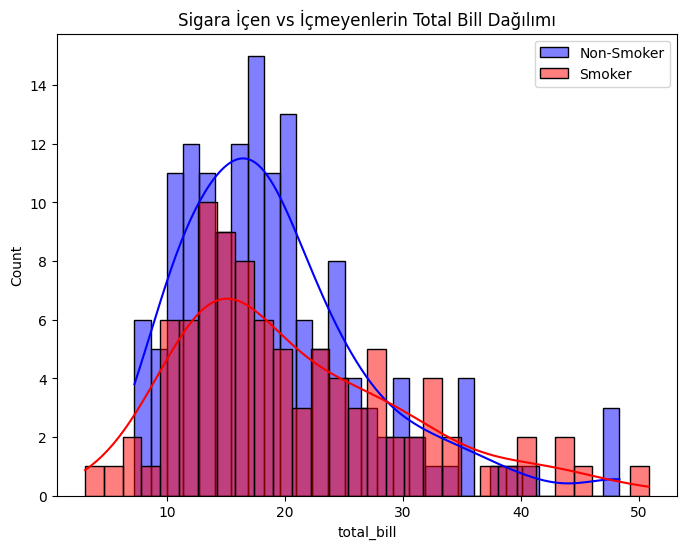

In [70]:
plt.figure(figsize=(8,6))

sns.histplot(df[df["smoker"]=="No"]["total_bill"],bins=30, kde=True, color="blue", label="Non-Smoker", alpha=0.5)
sns.histplot(df[df["smoker"]=="Yes"]["total_bill"], bins=30, kde=True, color="red", label="Smoker", alpha=0.5)

plt.legend()
plt.title("Sigara İçen vs İçmeyenlerin Total Bill Dağılımı")
plt.show() # datayı iki farklı şekilde göstermiş de olduk 

In [ ]:
df_yes =df[df["smoker"]=="Yes"]
df_no = df[df["smoker"]=="No"]

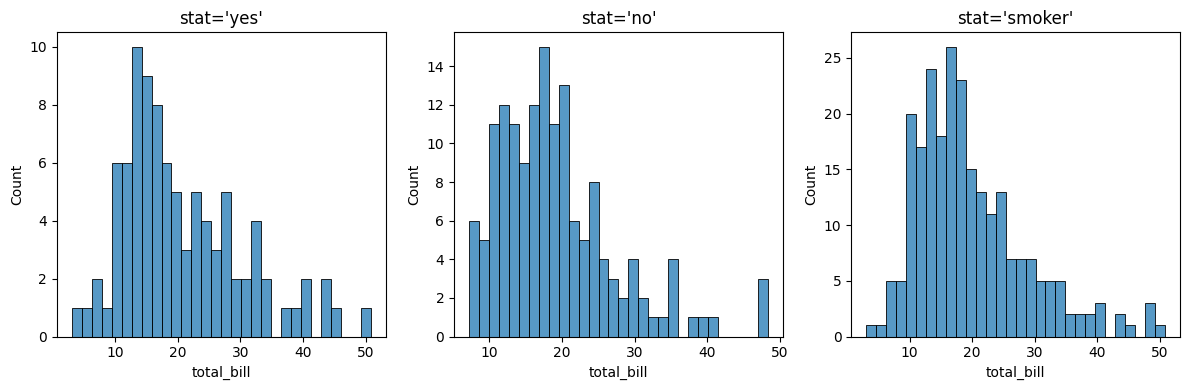

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(data=df_yes, x="total_bill", stat="count",bins=30)
plt.title("stat='yes'")

plt.subplot(1,3,2)
sns.histplot(data=df_no, x="total_bill",stat="count",bins=30)
plt.title("stat='no'")

plt.subplot(1,3,3)
sns.histplot(data=df, x="total_bill", stat="count",bins=30)
plt.title("stat='smoker'")

plt.tight_layout()
plt.show()


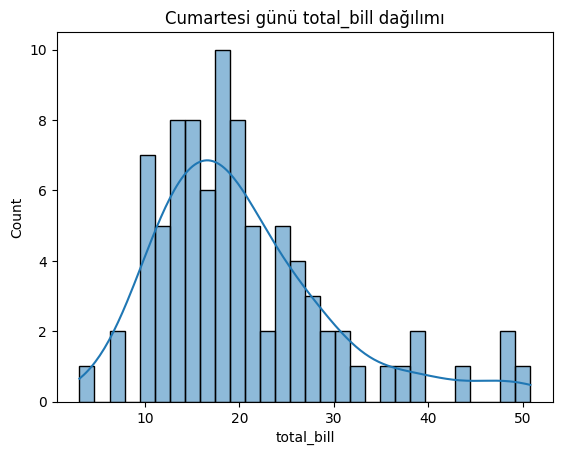

In [35]:
df_sat = df[df["day"] == "Sat"]
sns.histplot(data=df_sat, x="total_bill", kde=True, bins=30)
plt.title("Cumartesi günü total_bill dağılımı")
plt.show()
# bu şekilde her bir gun için total_bilee bakabiliriz   

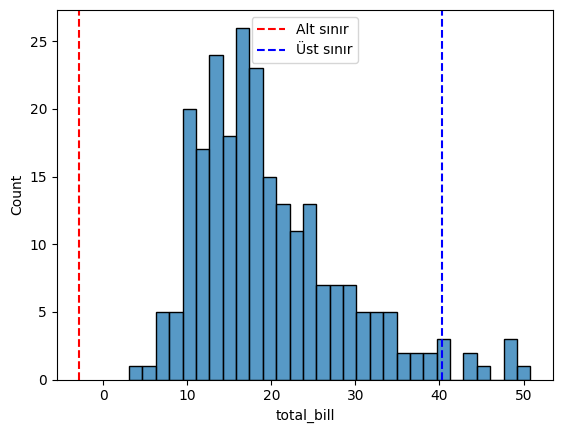

In [36]:
Q1 = df["total_bill"].quantile(0.25)
Q3 = df["total_bill"].quantile(0.75)
IQR = Q3 - Q1
alt = Q1 - 1.5 * IQR
ust = Q3 + 1.5 * IQR

sns.histplot(data=df, x="total_bill", bins=30)
plt.axvline(alt, color="red", linestyle="--", label="Alt sınır")
plt.axvline(ust, color="blue", linestyle="--", label="Üst sınır")
plt.legend()
plt.show()


ilk bakışta baktığımız zaman yoğunluk olarak 10-20 doloar arasında 

sigara içmeyenlerin sigara içenlere göre daha fazla ücret ödediği görülmekte 

üst sınırı aşan cok fazla yapı yok 

## KDE

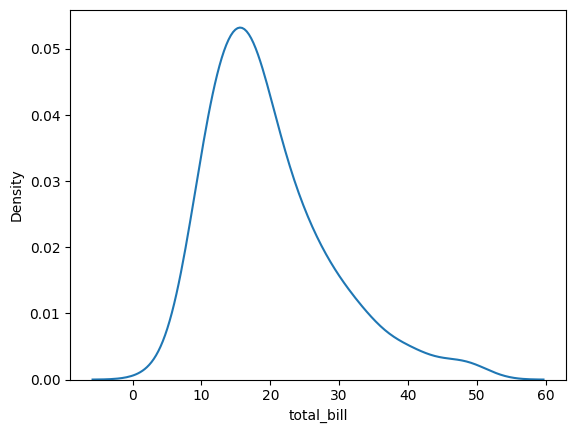

In [37]:
sns.kdeplot(data=df, x="total_bill")
plt.show()


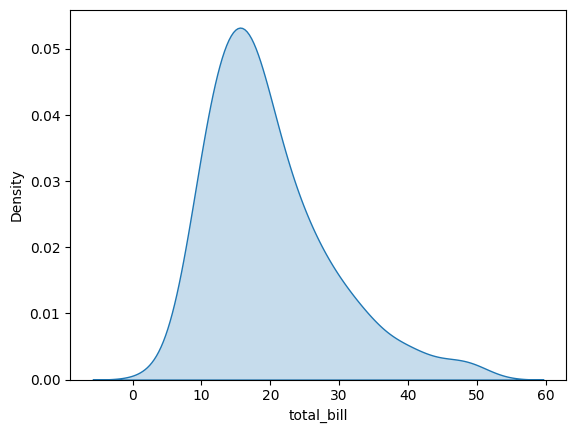

In [38]:
sns.kdeplot(data=df, x="total_bill", fill=True)
plt.show()
# fill ile altını dolgulu bir şekilde yaparız

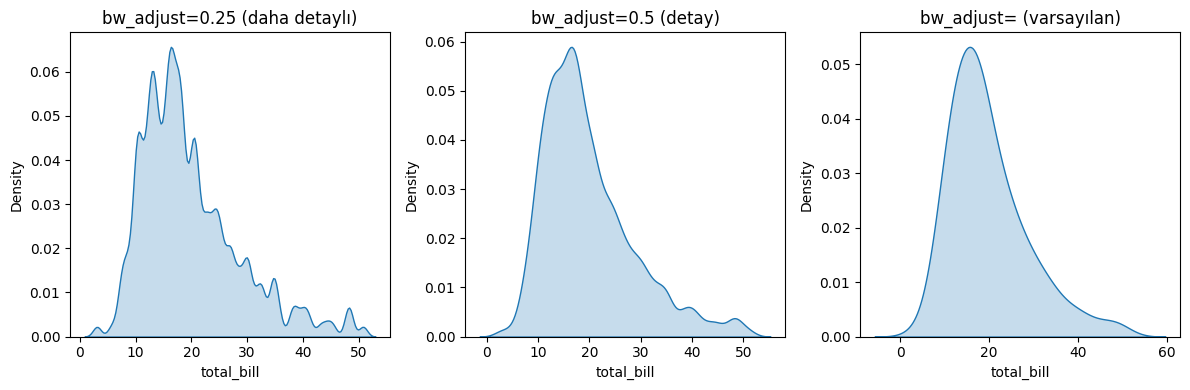

In [39]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.kdeplot(data=df, x="total_bill", bw_adjust=0.25, fill=True)
plt.title("bw_adjust=0.25 (daha detaylı)")

plt.subplot(1,3,2)
sns.kdeplot(data=df, x="total_bill", bw_adjust=0.5, fill=True)
plt.title("bw_adjust=0.5 (detay)")

plt.subplot(1,3,3)
sns.kdeplot(data=df, x="total_bill", bw_adjust=1, fill=True)
plt.title("bw_adjust= (varsayılan)")

plt.tight_layout()
plt.show()


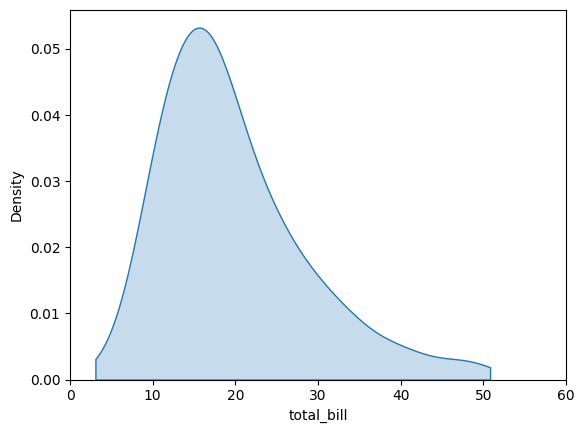

In [40]:
sns.kdeplot(data=df, x="total_bill", fill=True, clip=(0, 60), cut=0)
plt.xlim(0, 60)
plt.show()
# clip istediğimiz değere kadar yoğunluk filtersi uygular sonra da keser

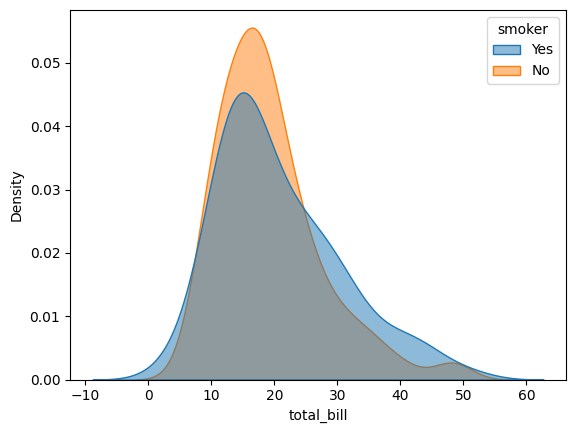

In [41]:
sns.kdeplot(data=df, x="total_bill", hue="smoker", fill=True, common_norm=False, alpha=0.5)
plt.show()
# barplot ile aynı sonuca cıkıyor 

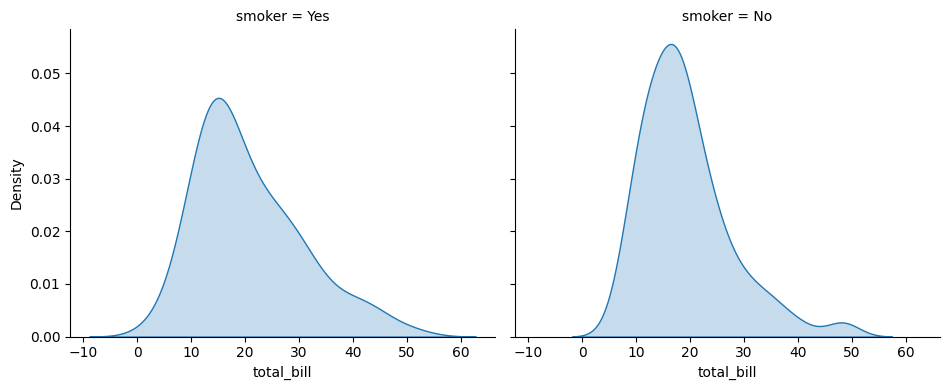

In [42]:
g = sns.FacetGrid(df, col="smoker", height=4, aspect=1.2)
g.map(sns.kdeplot, "total_bill", fill=True)
plt.show()

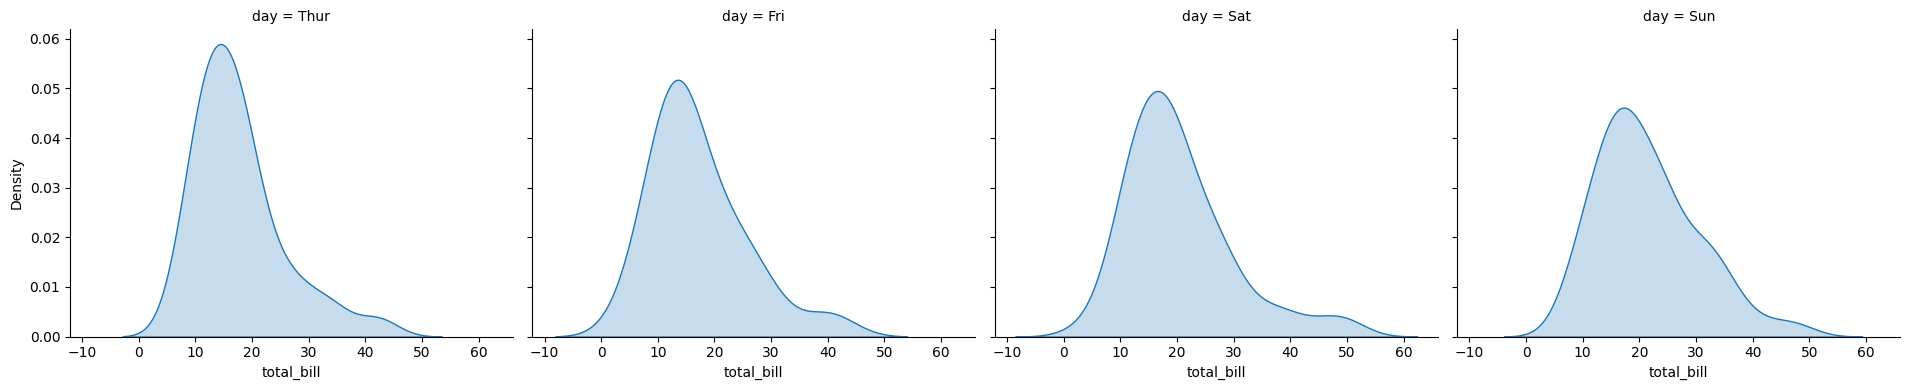

In [43]:
g = sns.FacetGrid(df, col="day", height=4, aspect=1.2)
g.map(sns.kdeplot, "total_bill", fill=True)
plt.show()

her bir gun için tek tek yoğunluk hesabı

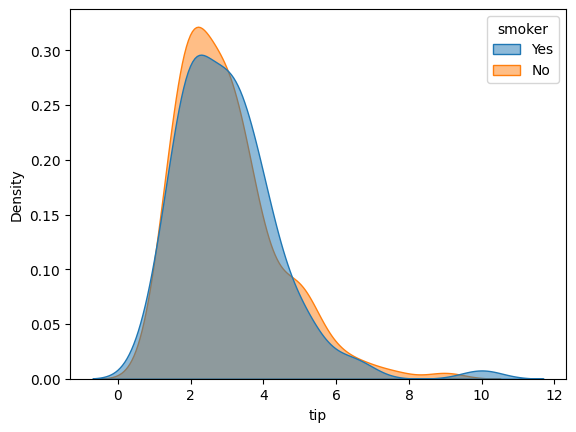

In [44]:
sns.kdeplot(data=df, x="tip", hue="smoker", fill=True, common_norm=False, alpha=0.5)
plt.show() # tip verme olayı birbine cok benzer olsa da sigar icmeyenler daha yusek vermiş

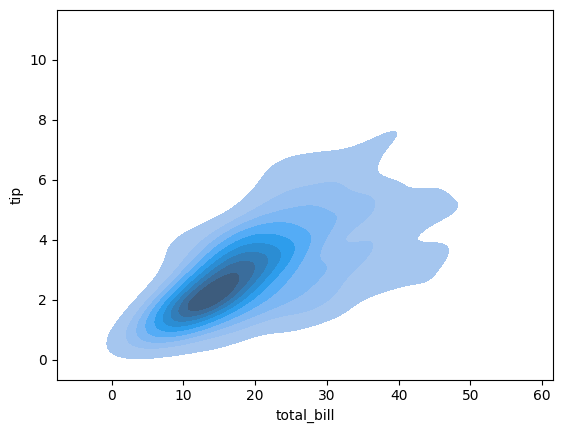

In [45]:
sns.kdeplot(
    data=df,
    x="total_bill",
    y="tip",
    fill=True,
    thresh=0.05
)
plt.show()


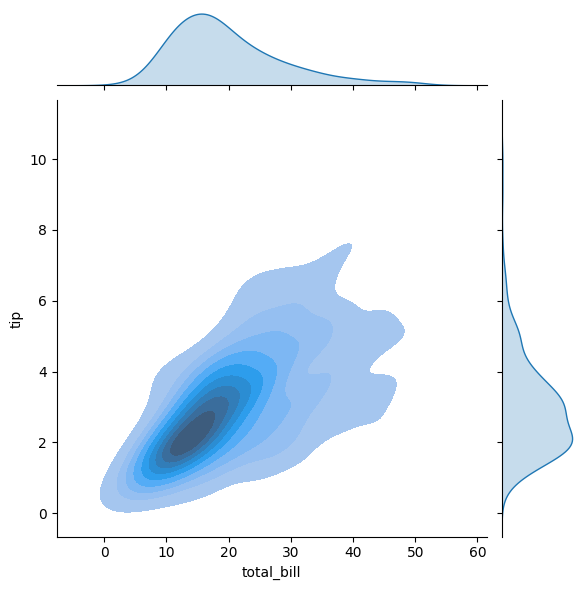

In [46]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="kde", fill=True)


## BOXPLOT

<Axes: xlabel='total_bill'>

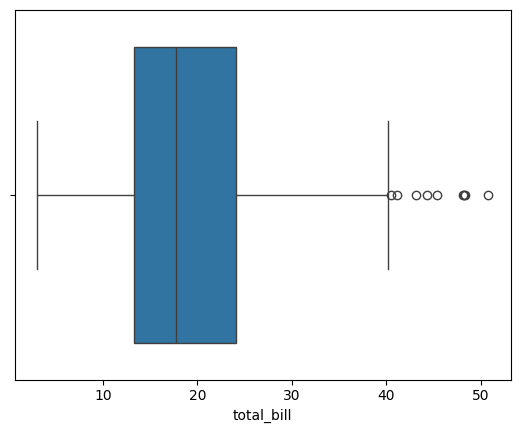

In [47]:
sns.boxplot(x=df["total_bill"])

<Axes: ylabel='total_bill'>

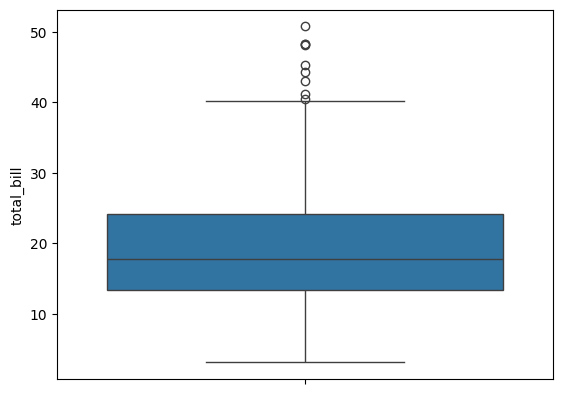

In [48]:
sns.boxplot(y=df["total_bill"])

<Axes: xlabel='tip'>

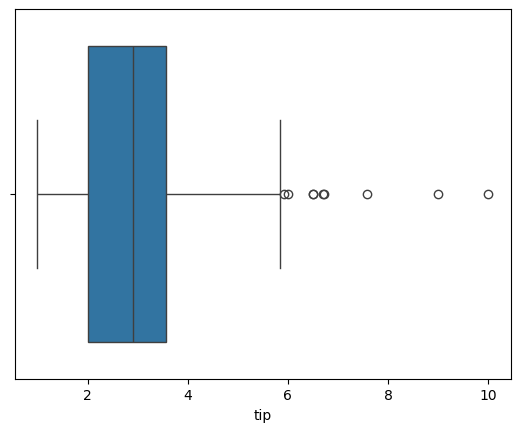

In [49]:
sns.boxplot(x=df["tip"])

<Axes: ylabel='tip'>

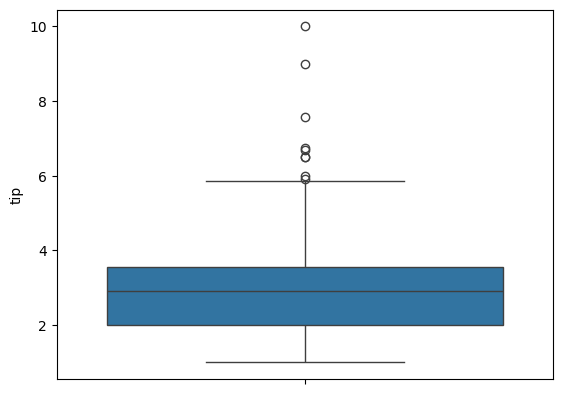

In [50]:
sns.boxplot(y=df["tip"])

<Axes: xlabel='day', ylabel='total_bill'>

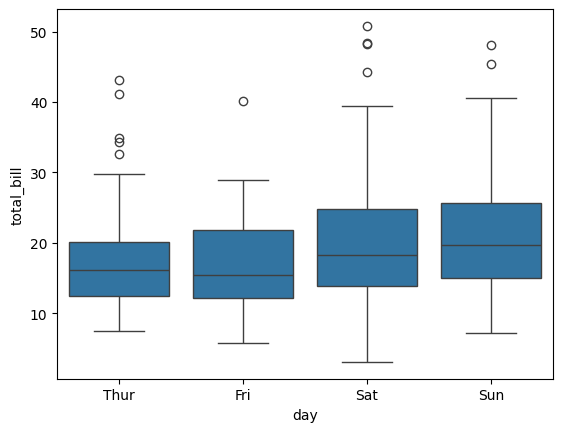

In [51]:
sns.boxplot(x="day", y="total_bill", data=df)

her bir gunun ayrı ayrı bir şekilde ortalmasını bulmuş ve bunların dışnda kalan değerleri görmüş olduk

<Axes: xlabel='day', ylabel='tip'>

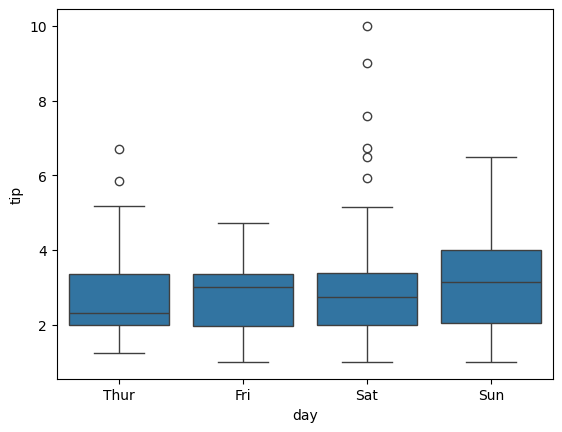

In [52]:
sns.boxplot(x="day", y="tip", data=df)


en çok mütşterinin geldiği gün bahişi ortalamsı düşük olsa dahi ort dışında bahişin veren müşteri daha cok. bunu yanı sıra pazar günü gelen müşterişer daha çok bahşiş verme eğlimi sergiliyor

<Axes: xlabel='day', ylabel='total_bill'>

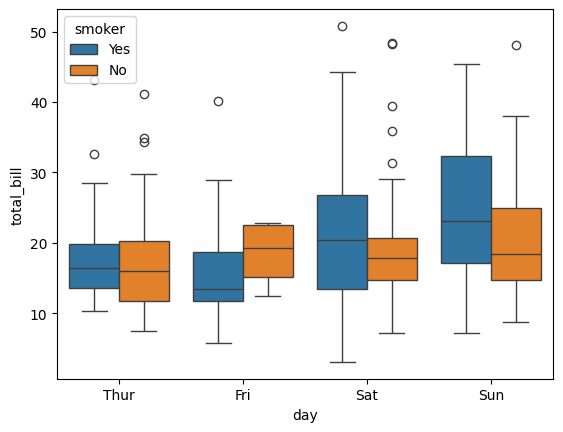

In [56]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=df)

<Axes: xlabel='day', ylabel='tip'>

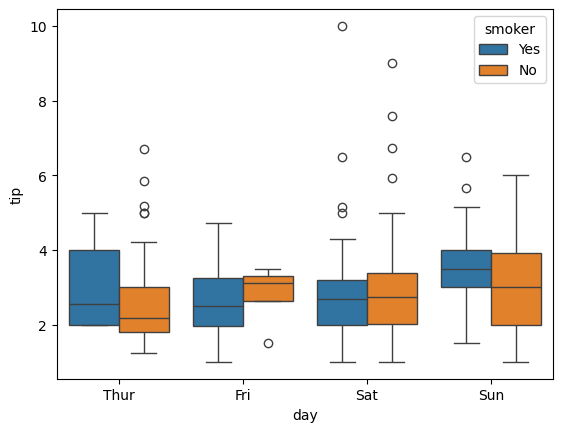

In [55]:
sns.boxplot(x="day", y="tip", hue="smoker", data=df)

<Axes: xlabel='day', ylabel='tip'>

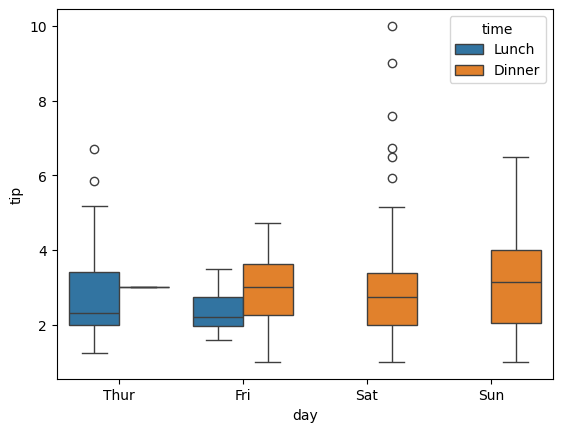

In [58]:
sns.boxplot(x="day", y="tip", hue="time", data=df)


<Axes: xlabel='day', ylabel='total_bill'>

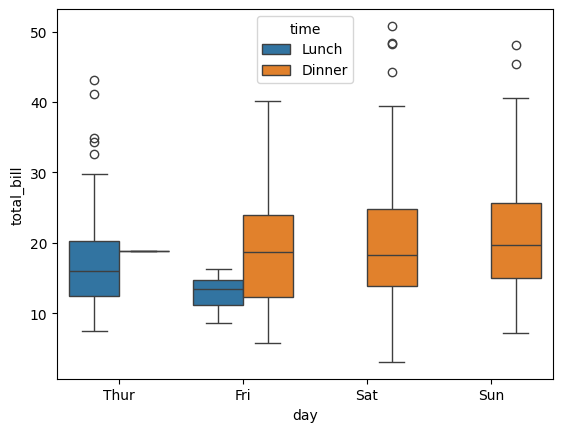

In [59]:
sns.boxplot(x="day", y="total_bill", hue="time", data=df)


In [60]:
df.groupby(["day", "time"]).size()

C:\Users\05hde\AppData\Local\Temp\ipykernel_15152\620007664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["day", "time"]).size()


day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Lunch      0
      Dinner    87
Sun   Lunch      0
      Dinner    76
dtype: int64

görsel üzerinden gördüğüümüz test etmek amacı ile groupby işlemi yaptık ve görseldeki gibi hafta sonları öğle yemeği sevirsi yokken hafta içi de çok az akşam yemeği servisi var 

In [63]:
df[(df["day"] == "Thur") & (df["time"] == "Dinner")] # perşembe akşam yemek yiyen tek kişi bu kişi 

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2


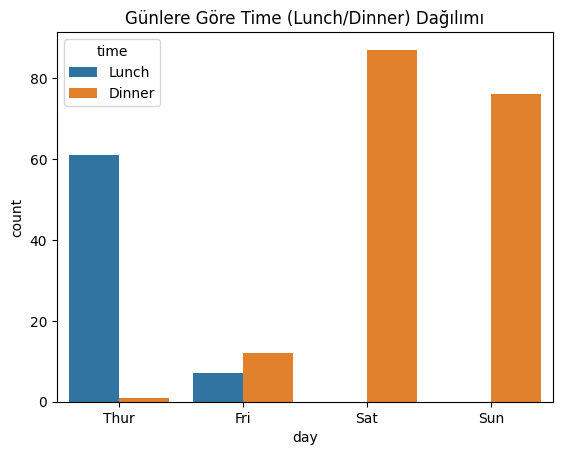

In [ ]:
sns.countplot(x="day", hue="time", data=df)
plt.title("Günlere Göre Time (Lunch/Dinner) Dağılımı")
plt.show()
# daha görmedik

<Axes: xlabel='day', ylabel='total_bill'>

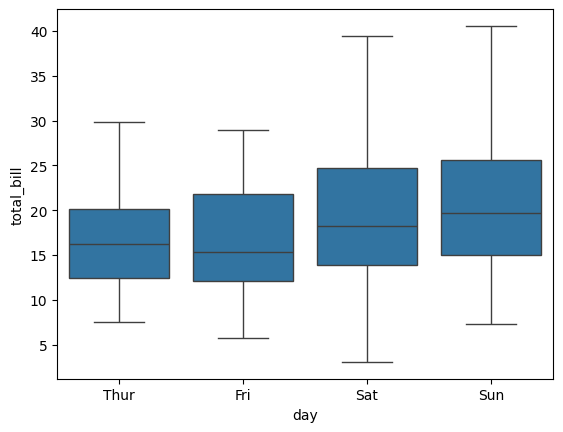

In [71]:
sns.boxplot(x="day", y="total_bill", data=df, showfliers=False) # kutunun dışındaki noktaları çizmez

<Axes: xlabel='day', ylabel='total_bill'>

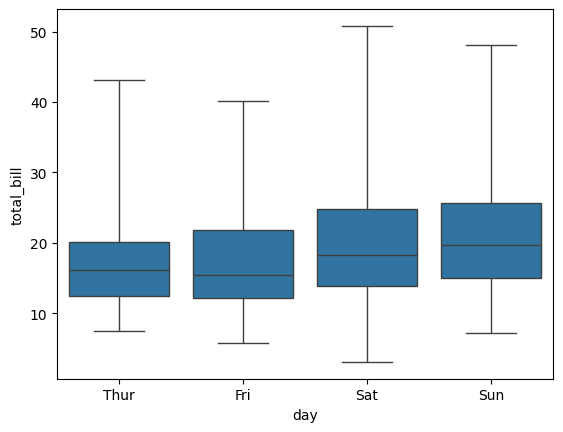

In [74]:
sns.boxplot(x="day", y="total_bill", data=df, whis=5)

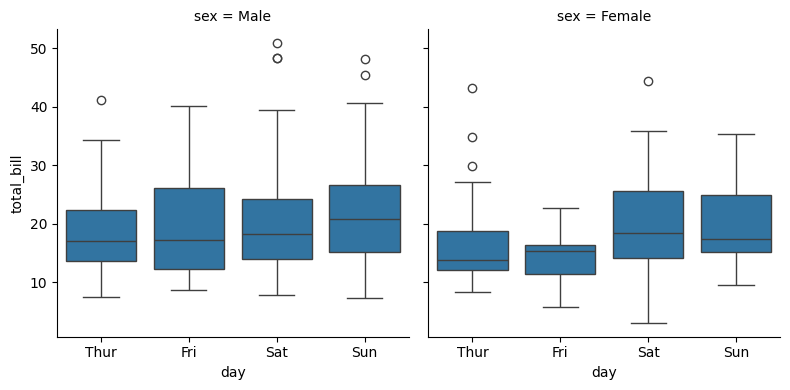

In [75]:
g = sns.FacetGrid(df, col="sex", height=4, aspect=1.0, sharey=True)
g.map_dataframe(sns.boxplot, x="day", y="total_bill")
plt.show()
# böylelikle sex ve day katogorik değişkneleri tek bir tablo da değil de ayrı tablo da detaylı bir şekilde görüyoruz 

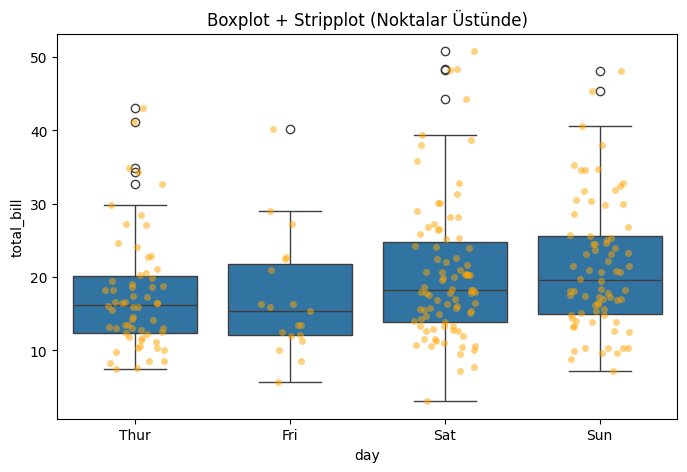

In [78]:
plt.figure(figsize=(8,5))
sns.boxplot(x="day", y="total_bill", data=df)
sns.stripplot(x="day", y="total_bill", data=df, color="orange", alpha=0.5, jitter=0.2)
plt.title("Boxplot + Stripplot (Noktalar Üstünde)")
plt.show()
# bu da tüm verileri görmemizi sağlar 

## Countlpot

<Axes: xlabel='day', ylabel='count'>

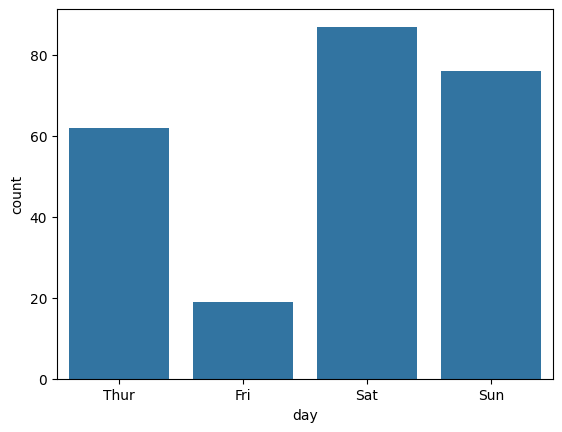

In [81]:
sns.countplot(x="day",data=df) #günlere göre müşteri sayısı

<Axes: xlabel='smoker', ylabel='count'>

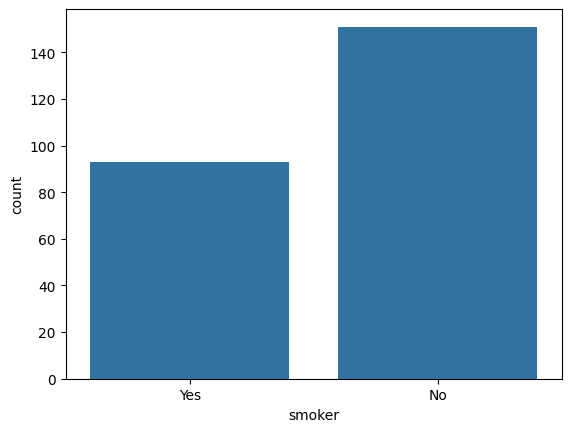

In [82]:
sns.countplot(x="smoker",data=df) #toplam müşterliern kaçınını sigara itçiği kaçaının içmediği

In [83]:
df.value_counts("smoker") #bu veriinin tablo hali

smoker
No     151
Yes     93
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='day'>

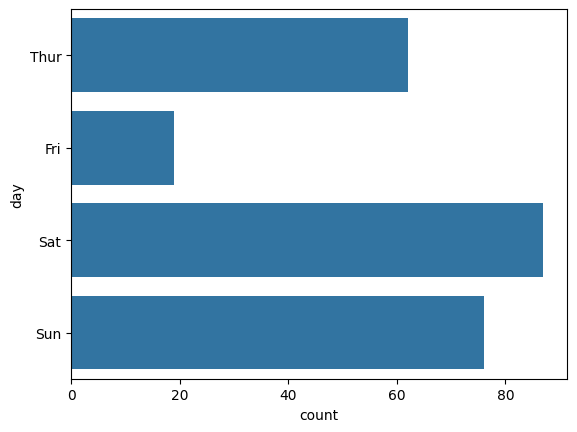

<Axes: xlabel='day', ylabel='count'>

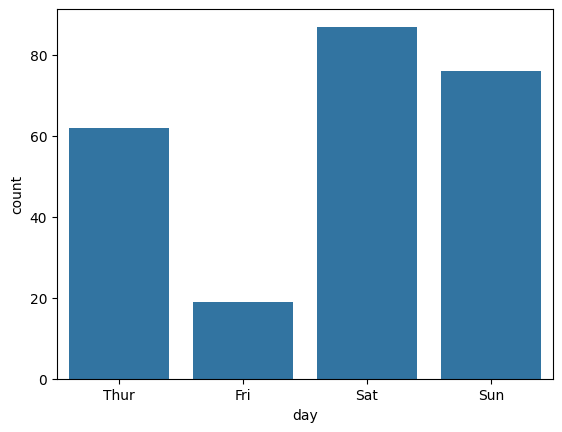

In [85]:
sns.countplot(x="day", data=df, order=["Thur", "Fri", "Sat", "Sun"]) # oder ile kendi sıramıız veriyoruz 

<Axes: xlabel='day', ylabel='count'>

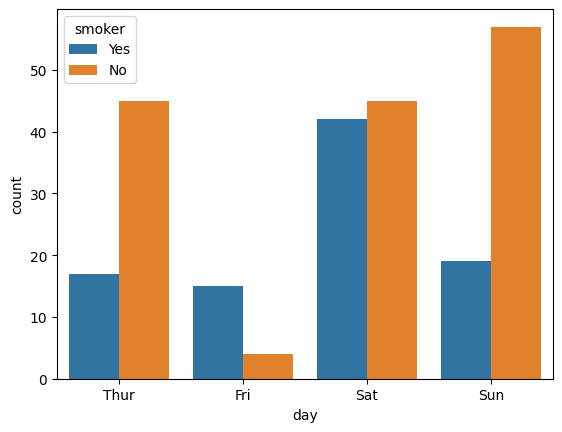

In [86]:
sns.countplot(x="day", hue="smoker", data=df) 

<Axes: xlabel='smoker', ylabel='count'>

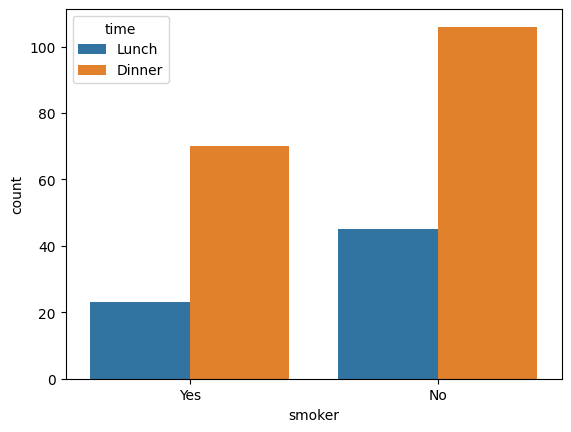

In [88]:
sns.countplot(x="smoker", hue="time", data=df) 


In [90]:
pd.crosstab(df["smoker"], df["time"]) # tablo da gördüğümüz veriniin dikret hali


time,Lunch,Dinner
smoker,,
Yes,23,70
No,45,106


In [91]:
oranlar = df["day"].value_counts(normalize=True) * 100
oranlar


day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: proportion, dtype: float64

<Axes: xlabel='day', ylabel='count'>

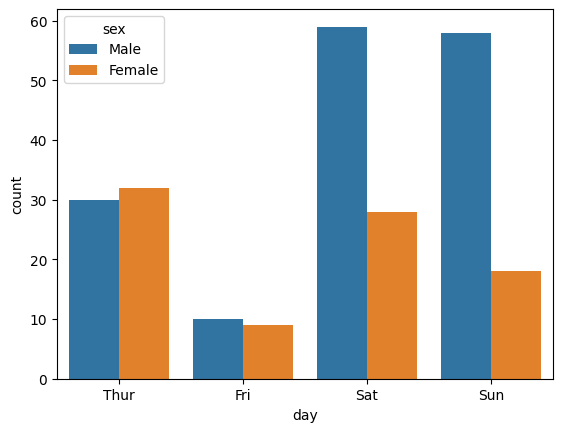

In [93]:
sns.countplot(x="day", hue="sex", data=df) 


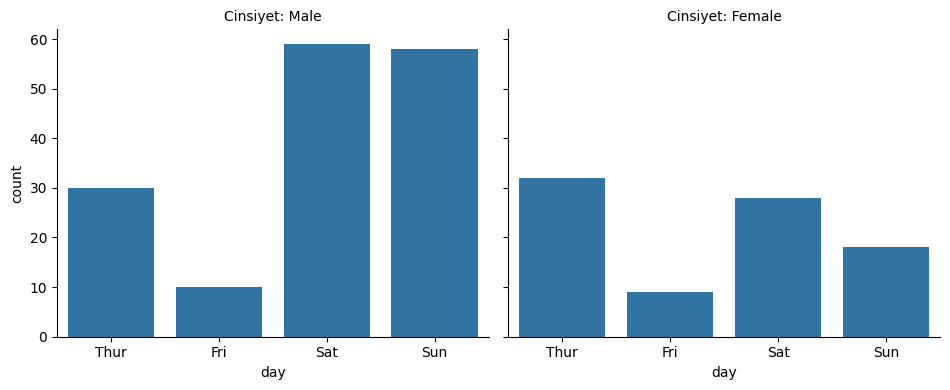

In [94]:
g = sns.FacetGrid(df, col="sex", height=4, aspect=1.2)
g.map_dataframe(sns.countplot, x="day")
g.set_titles("Cinsiyet: {col_name}")
plt.show() # bu sondaki iki kod aynı şey fakat farklı gösterim


<Axes: xlabel='size', ylabel='count'>

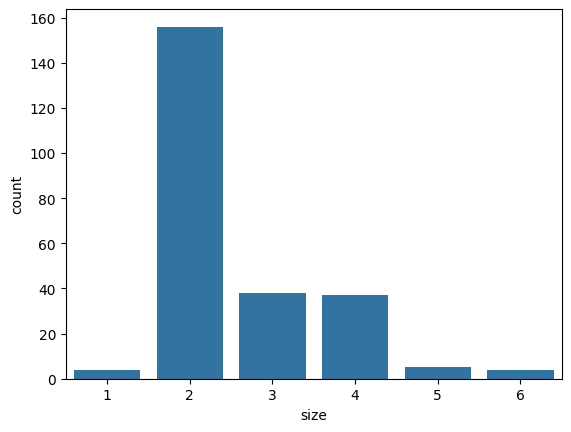

In [96]:
sns.countplot(x="size", data=df) # burada sayısal bir değişken aam çok fazla farklı deeğerler 
# içermediği için katogrik bir değişken gibi oluyor ve kaç kişinin buşekilde geldğğini göstermiş oluyor 

In [98]:
pd.crosstab(df["size"],df["day"])

day,Thur,Fri,Sat,Sun
size,,,,
1,1,1,2,0
2,48,16,53,39
3,4,1,18,15
4,5,1,13,18
5,1,0,1,3
6,3,0,0,1


<Axes: ylabel='total_bill'>

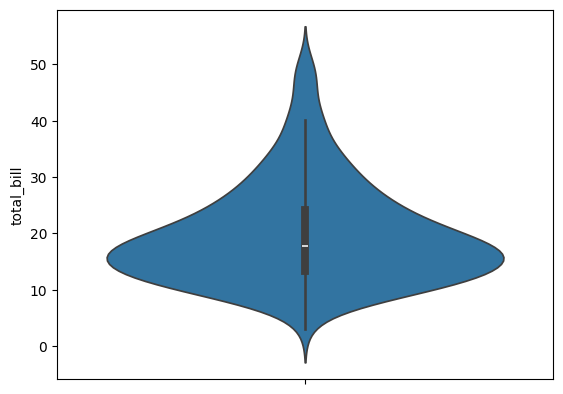

In [99]:
sns.violinplot(y="total_bill",data=df)

<Axes: xlabel='total_bill'>

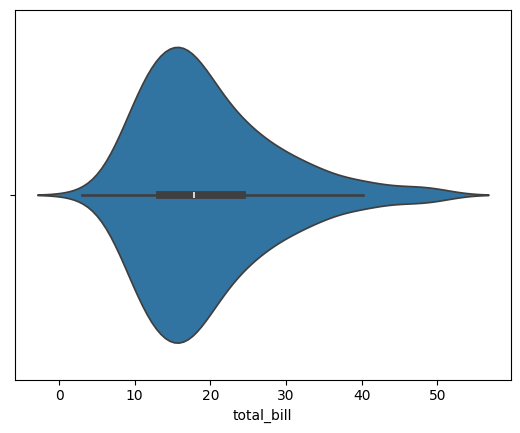

In [100]:
sns.violinplot(x="total_bill",data=df)


<Axes: xlabel='day', ylabel='total_bill'>

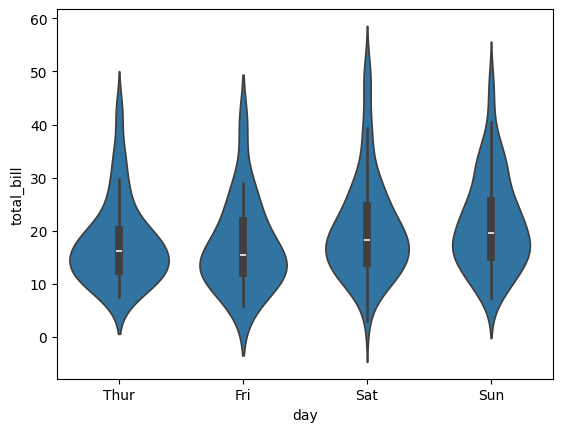

In [101]:
sns.violinplot(x ="day",y="total_bill",data=df)


<Axes: xlabel='day', ylabel='total_bill'>

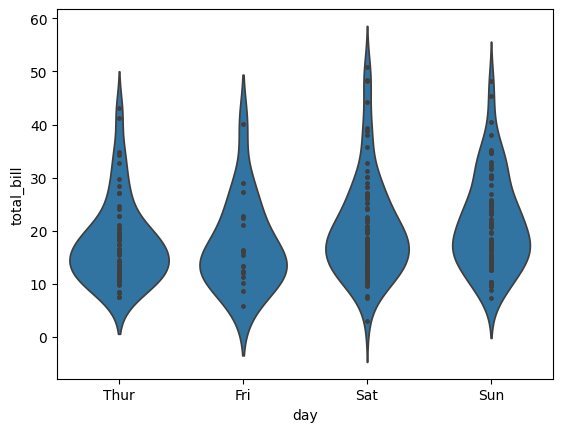

In [103]:
sns.violinplot(x ="day",y="total_bill",data=df,inner="point")


<Axes: xlabel='day', ylabel='tip'>

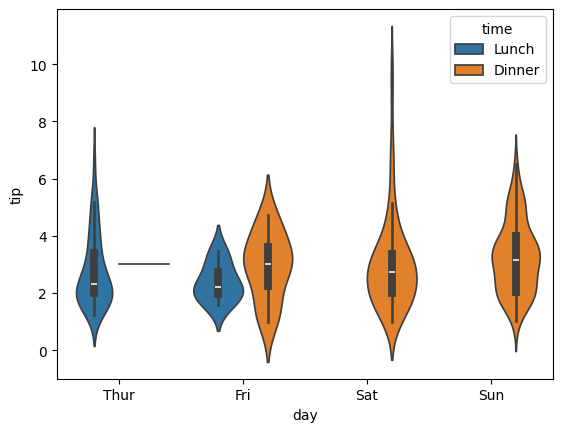

In [106]:
sns.violinplot(x="day", y="tip", hue="time", data=df) # split true ya gerek yok cunku coğu gun aynı adan yemek yok

C:\Users\05hde\AppData\Local\Temp\ipykernel_15152\2965090635.py:4: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x="day", y="total_bill", data=df, bw=0.2)
C:\Users\05hde\AppData\Local\Temp\ipykernel_15152\2965090635.py:8: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x="day", y="total_bill", data=df, bw=0.5)
C:\Users\05hde\AppData\Local\Temp\ipykernel_15152\2965090635.py:12: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=1`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.viol

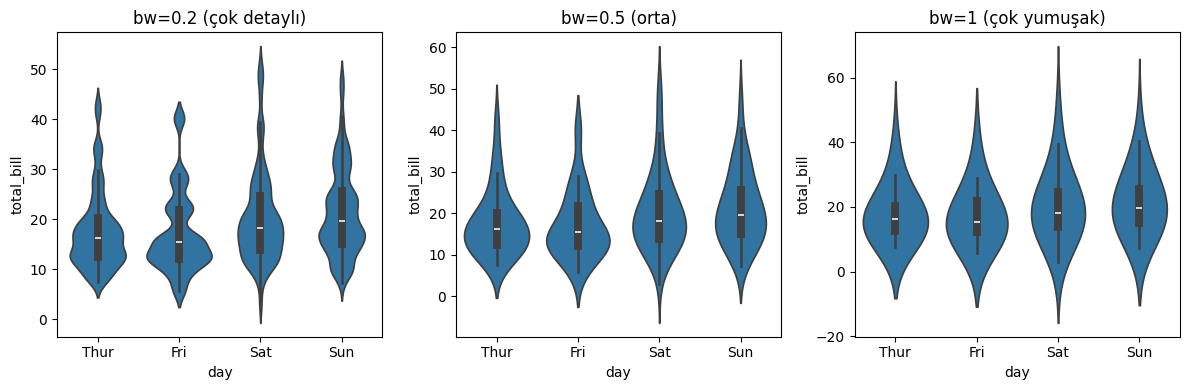

In [107]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.violinplot(x="day", y="total_bill", data=df, bw=0.2)
plt.title("bw=0.2 (çok detaylı)")

plt.subplot(1,3,2)
sns.violinplot(x="day", y="total_bill", data=df, bw=0.5)
plt.title("bw=0.5 (orta)")

plt.subplot(1,3,3)
sns.violinplot(x="day", y="total_bill", data=df, bw=1)
plt.title("bw=1 (çok yumuşak)")

plt.tight_layout()
plt.show()


bw değişkeni kde de ki bw_adjust’e benzer burada küçük olursa daha detaylı bir kumeleme veirriken buyudkçe daha kaba bir veri verir

<Axes: xlabel='day', ylabel='total_bill'>

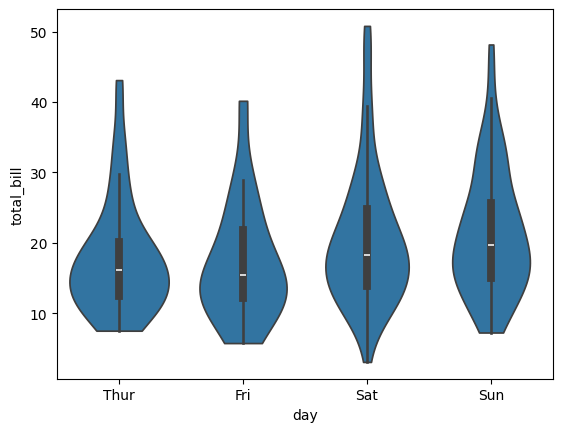

In [108]:
sns.violinplot(x="day", y="total_bill", data=df, cut=0) # cut ile veriden dışarı taşmaya engelleriz 

C:\Users\05hde\AppData\Local\Temp\ipykernel_15152\3262435239.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="day", y="total_bill", data=df, scale="count") # gözklem sayasına göre şişklink artar veya azalır


<Axes: xlabel='day', ylabel='total_bill'>

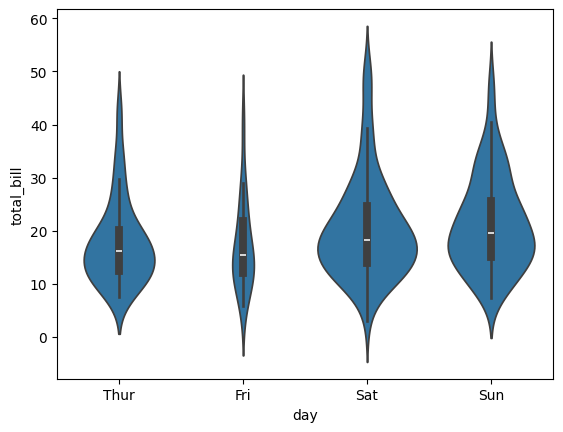

In [110]:
sns.violinplot(x="day", y="total_bill", data=df, scale="count") # gözklem sayasına göre şişklink artar veya azalır

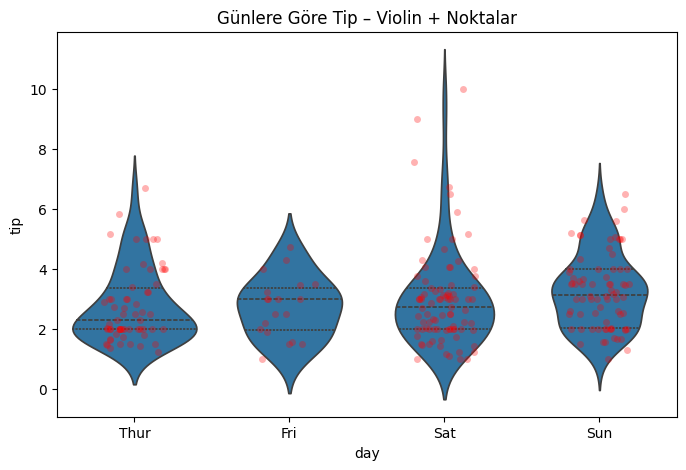

In [113]:
plt.figure(figsize=(8,5))
sns.violinplot(x="day", y="tip", data=df, inner="quartile")
sns.stripplot(x="day", y="tip", data=df, color="red", alpha=0.3, jitter=0.2)
plt.title("Günlere Göre Tip – Violin + Noktalar")
plt.show()
# box plot gibi verileri direkt olarak görebiiriz 

## Stripplot

<Axes: xlabel='day', ylabel='total_bill'>

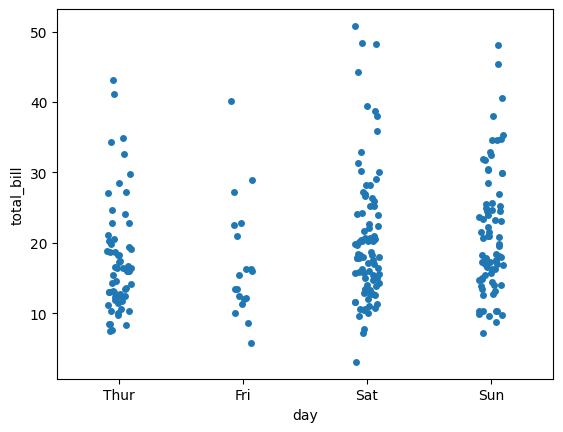

In [116]:
sns.stripplot(x=df["day"],y=df["total_bill"])

<Axes: xlabel='day', ylabel='total_bill'>

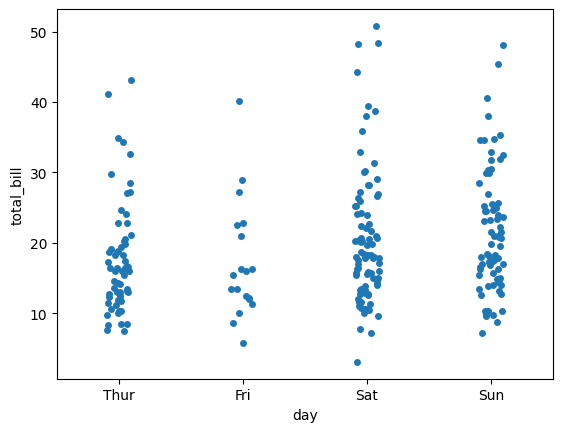

In [118]:
sns.stripplot(data=df , x = "day",y="total_bill",jitter=True) # noktalrı cok az birbrinden ayırmaya yarar

<Axes: xlabel='day', ylabel='total_bill'>

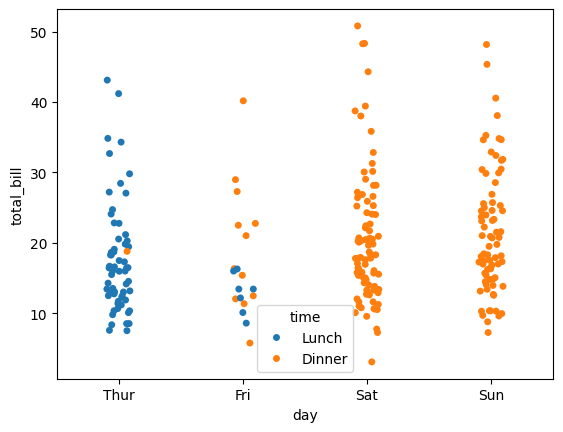

In [119]:
sns.stripplot(data=df , x = "day",y="total_bill",jitter=True,hue="time")

<Axes: xlabel='day', ylabel='total_bill'>

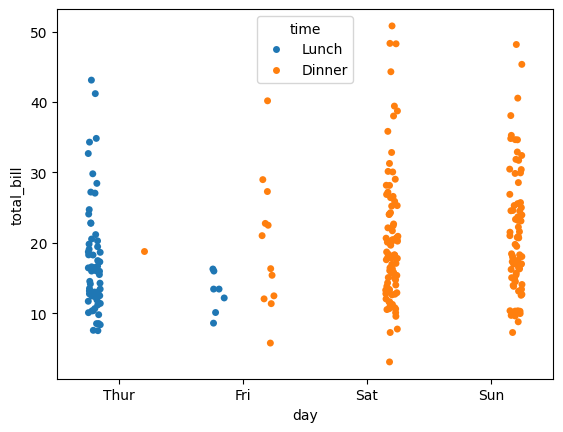

In [121]:
sns.stripplot(data=df , x = "day",y="total_bill",jitter=True,hue="time",dodge=True) # hue ile verilen verileri ayrı iki sütün şeklinde yazar

<Axes: xlabel='day', ylabel='total_bill'>

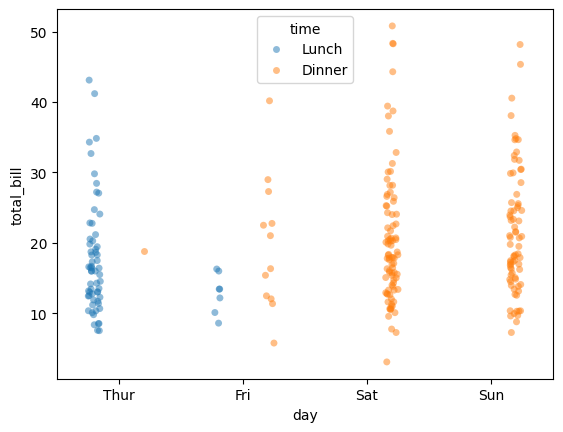

In [122]:
sns.stripplot(data=df , x = "day",y="total_bill",jitter=True,hue="time",dodge=True,alpha=0.5)
# saydamlık ile arkada kalan verileri görmemizi sağlar ve yoğun olan yerler daha cok belli olur 

<Axes: xlabel='day', ylabel='total_bill'>

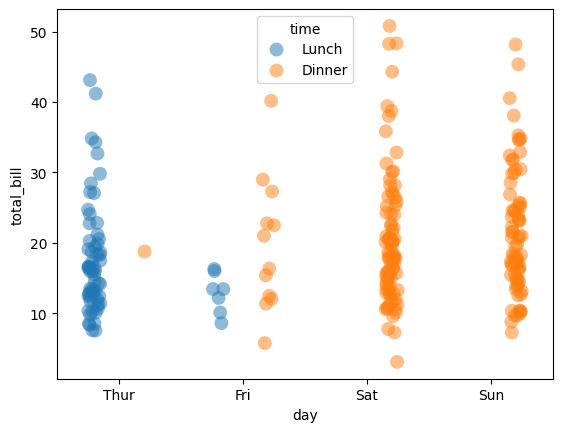

In [124]:
sns.stripplot(data=df , x = "day",y="total_bill",jitter=True,hue="time",dodge=True,alpha=0.5,size=10)
# size nokta boyutunu arttır 

# İki Değişkenli 

## Barplot 

<Axes: xlabel='day', ylabel='total_bill'>

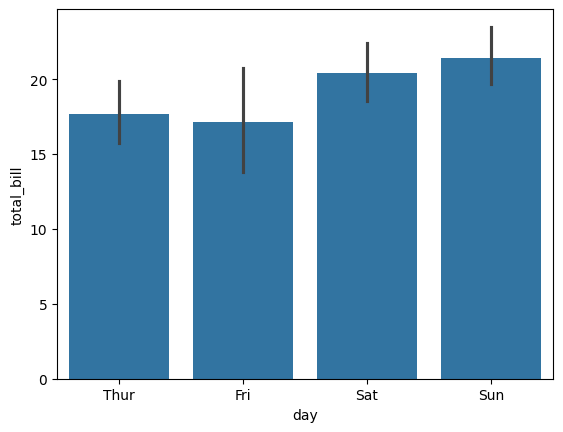

In [125]:
sns.barplot(x="day", y="total_bill", data=df) # ort hesabı

<Axes: xlabel='day', ylabel='tip'>

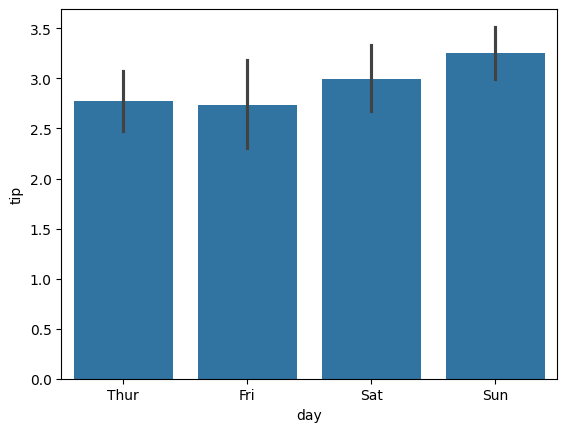

In [126]:
sns.barplot(x="day", y="tip", data=df) # ort hesabı


<Axes: xlabel='day', ylabel='total_bill'>

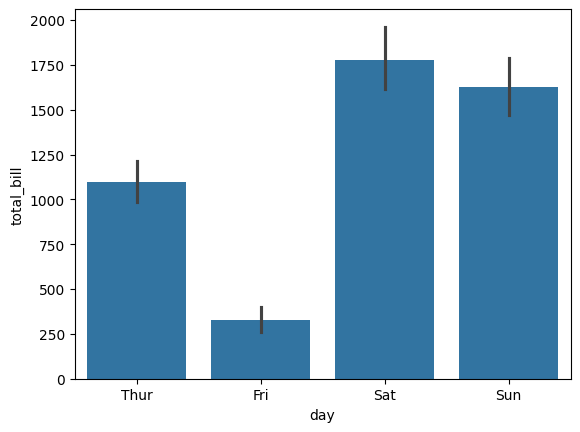

In [128]:
sns.barplot(x="day", y="total_bill", data=df, estimator=np.sum)
# estimator ile istediğimz seyi göstermeisni sağlayabiriz

<Axes: xlabel='day', ylabel='total_bill'>

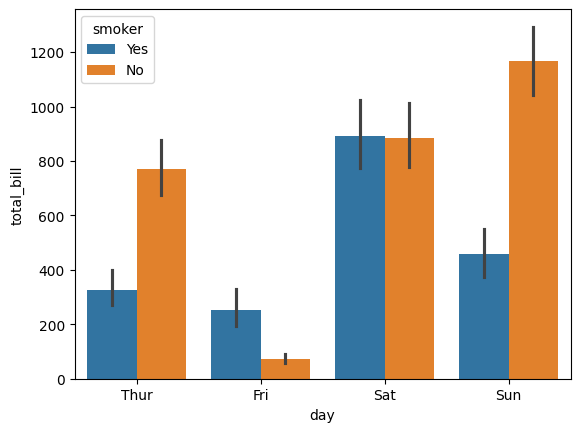

In [130]:
sns.barplot(x="day", y="total_bill",hue="smoker", data=df, estimator=np.sum)

C:\Users\05hde\AppData\Local\Temp\ipykernel_15152\3971554948.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x="day", y="total_bill", hue="smoker",data=df, estimator=np.sum,ci=68)


<Axes: xlabel='day', ylabel='total_bill'>

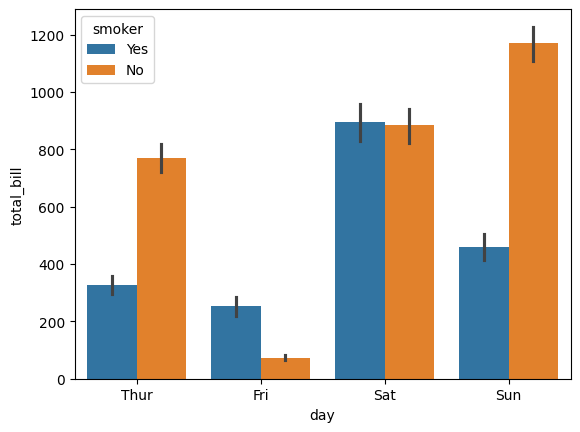

In [137]:
# üstündkei siya çizgi hatapayı verir
sns.barplot(x="day", y="total_bill", hue="smoker",data=df, estimator=np.sum,ci=68)

<Axes: xlabel='day', ylabel='total_bill'>

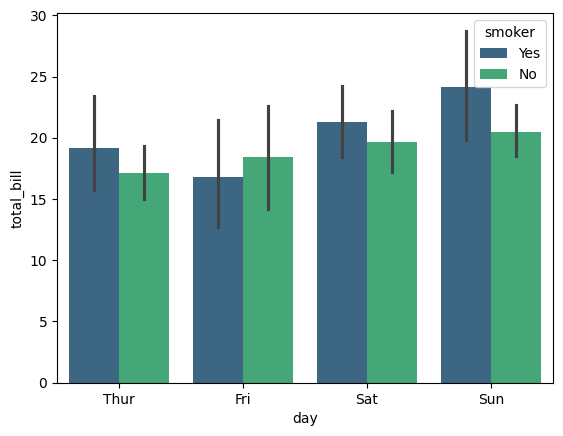

In [138]:
sns.barplot(x="day", y="total_bill", hue="smoker",
            data=df, palette="viridis") # otomaltik olan renk paletini değiştirdk


## Scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

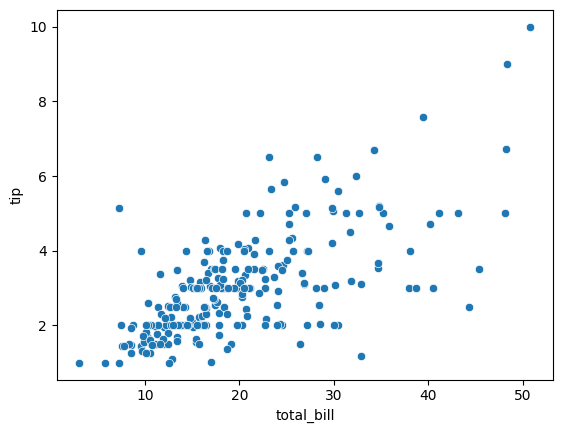

In [139]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

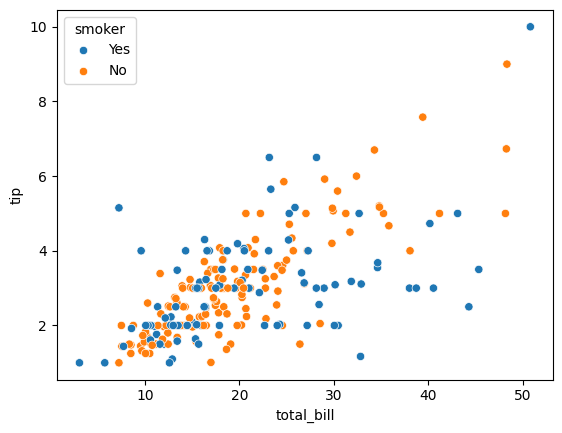

In [140]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="smoker")

<Axes: xlabel='total_bill', ylabel='tip'>

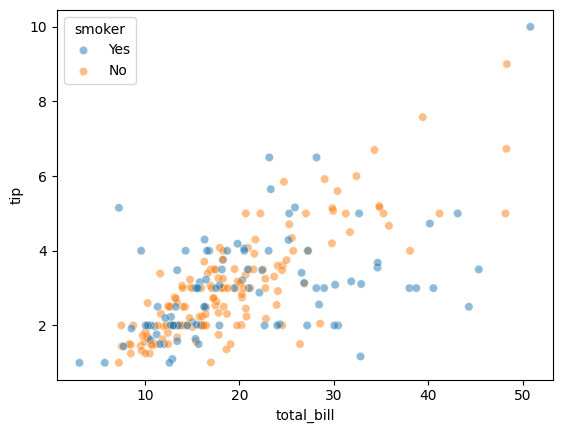

In [141]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="smoker",alpha=0.5)


<Axes: xlabel='total_bill', ylabel='tip'>

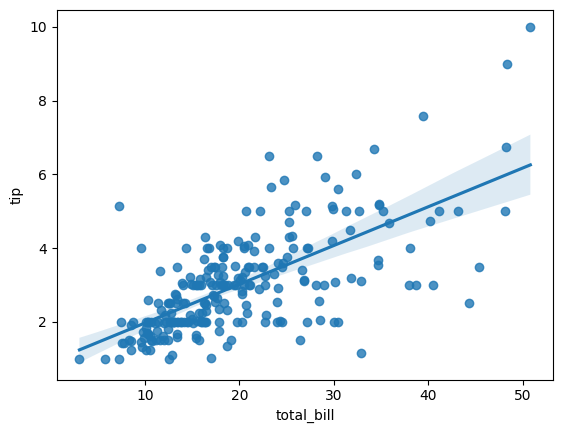

In [142]:
sns.regplot(x="total_bill",y="tip",data=df)

In [151]:
"""
sns.regplot(
    x="total_bill", y="tip",
    data=df, lowess=True
)
plt.title("LOWESS Eğrisi ile Scatterplot")
plt.show()
"""

'\nsns.regplot(\n    x="total_bill", y="tip",\n    data=df, lowess=True\n)\nplt.title("LOWESS Eğrisi ile Scatterplot")\nplt.show()\n'

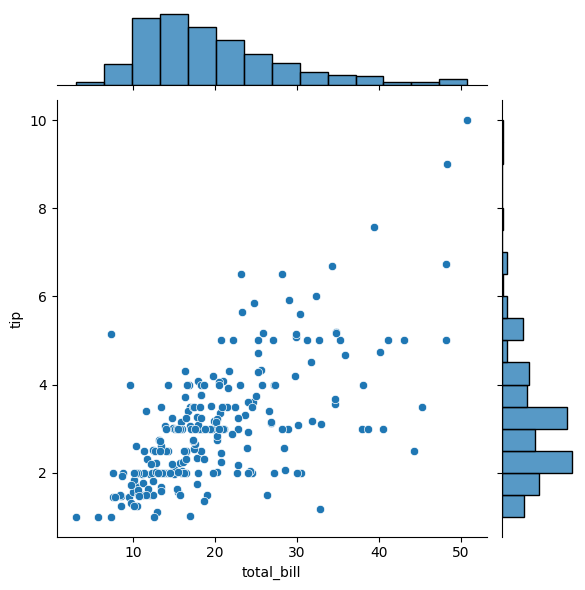

In [152]:
sns.jointplot(x="total_bill", y="tip", data=df, kind="scatter")


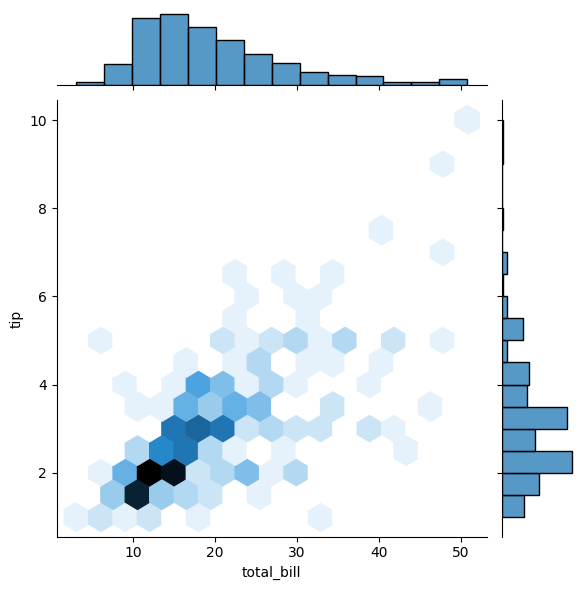

In [155]:
sns.jointplot(x="total_bill", y="tip", data=df, kind="hex") # hex ile her bir değeri nokta nokta değil de altıgen şeklilde yaptık
# kind bir den cok değer alabilir


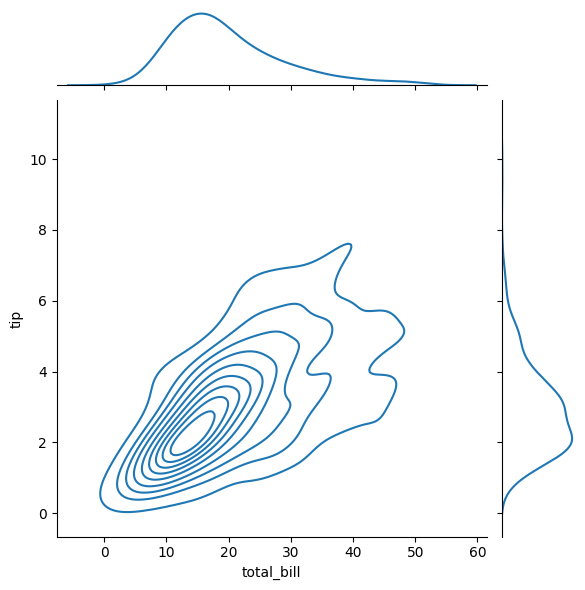

In [154]:
sns.jointplot(x="total_bill", y="tip", data=df, kind="kde")


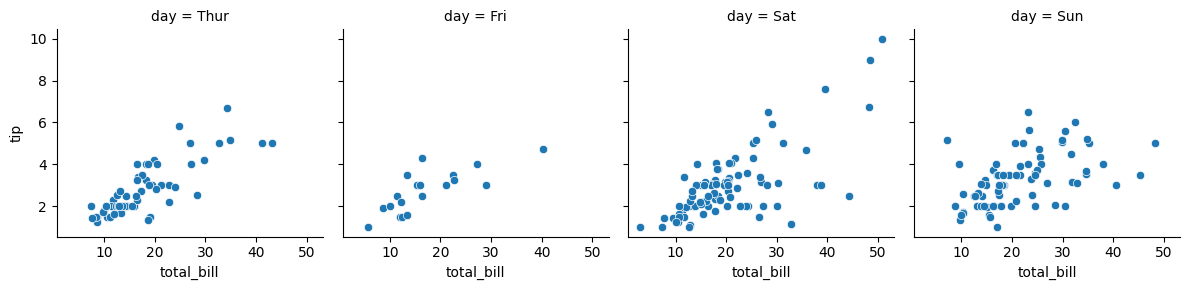

In [156]:
g = sns.FacetGrid(df, col="day")
g.map_dataframe(sns.scatterplot, "total_bill", "tip")
plt.show()


In [157]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object